# **Inferencia estadística**
# IE12. Prueba de Hipótesis para 2 muestras y Poder estadístico


## <font color='blue'>__Bibliografía__</font>
* Applied Statistics and Probability for Engineers. Douglas C. Montgomery, George C. Runger, 2013.

* Estadística para Administración y Economía. Paul Newbold, William L. Carlson y Betty Thorne, 2013.

* Estadística Aplicada a los Negocios y la Economía. Allen L. Webster, 2000.

* Things I have learned (so far) Am Psychol. Cohen J., 1990.

* Understanding The New Statistics (Multivariate Applications Series). Geoff Cumming , 2012.


## <font color='blue'>__Lecturas__</font>
* Sullivan GM, Feinn R. (2012). Using Effect Size-or Why the P Value Is Not Enough. J Grad Med Educ., 4(3):279-82. doi: 10.4300/JGME-D-12-00156.1 ***(leer ejemplo de Aspirina)***

* Kohavi, R., Longbotham, R., Sommerfield, D., & Henne, R. M. (2009). Controlled experiments on the web: survey and practical guide. Data Mining and Knowledge Discovery, 18(1), 140-181.

## <font color='blue'>**Introducción**</font>

Una prueba de hipótesis para dos muestras es similar en muchos aspectos a la prueba para una muestra.

* Se especifica una hipótesis nula ($H_0$). En la mayoría de los casos se propone que las medias, proporciones o varianzas de las dos poblaciones son iguales y se establece la hipótesis alternativa ($H_1$) indicando que dichos parámetros son diferente (bilateral) o que uno de ellos es mayor o menor que el otro (uniteral).
* Se especifica un nivel de significación $\alpha$, o Error Tipo I.
* Se calcula el _p-valor_: la probabilidad de obtener datos cuyas medias, proporciones o varianzas muestrales difieren tanto o más que la diferencia observada cuando $H_0$ es verdadera.

Si esta probabilidad es pequeña ($\text{p-value} \lt \alpha$) se rechaza $H_0$ y se concluye que __la diferencia observada no es atribuible al azar__ y las medias, proporciones o varianzas de las dos poblaciones son diferentes.


En este notebook se trabajará en pruebas de hipótesis de diferencia de medias y proporciones, en ambos casos para muestras independientes (no pareadas), ya que estas pruebas son las herramientas esenciales para liderar un experimento controlado.


>Notas:
>* Para pruebas de hipótesis de diferencias de medias para muestras pareadas se sugiere aplicar la prueba paramétrica T Student para muestras pareadas.
>
>* Para pruebas de hipótesis de diferencias de varianzas para muestras independientes (con datos normales) se sugiere aplicar la prueba paramétrica F Fisher.
>
>* Para pruebas de hipótesis de diferencias de varianzas para muestras independientes (con datos no normales) se sugiere aplicar la prueba paramétrica de Levene.
>
>* Para pruebas no paramétricas, para evaluar diferencias entre la distribución de 2 poblaciones, se sugiere aplicar la prueba no paramétrica U de Mann-Whitney.

## <font color='blue'>**Experimento controlado**</font>

Un experimento controlado compara los resultados obtenidos de muestras experimentales con muestras de control, que son prácticamente idénticas a la muestra experimental, excepto por el aspecto o factor modificado, cuyo efecto se está probando (la variable independiente).

En muchas investigaciones (ensayos clínicos, mejora de procesos, marketing, desarrollo de productos, etc.) es necesario realizar un experimento controlado para comparar ciertas características en dos o más grupos de personas o elementos (transacciones, productos, servicios, operaciones, etc.).  Veamos algunos ejemplos:

* el efecto que un tratamiento médico nuevo puede tienr (o no) sobre el  porcentaje de mejoría en comparación con otro estándar.
* el efecto de una campañas comerciales en el consumo de un producto en persona de distints localidades.
* el efecto de la suplementación de lecitina de soja sobre el perfil lipídico.
* el efecto de un nuevo modelo de servicio sobre la experiencia del cliente.
* el efecto de una nueva campaña comercial sobre la tasa de conversión.
* el efecto de una nueva funcionalidad de producto en la ventas.

Para esto es común diseñar un experimento donde se realice una comparación de 2 grupos para verificar si existen diferencias en la variable objeto de estudio. Estos grupos son:

* A) __Grupo de control__ (no reciben ningún tratamiento)
* B) __Grupo de experimental__ (al que aplicamos el tratamiento)

La Hipótesis Nula ($H_0$) planteará que el efecto del tratamiento experimental es similar a cuando no se recibe ningún tratamiento.


**Ventajas de un Experimento Controlado:**

* Los Experimentos Controlados comprueban las relaciones causales más allá de la correlación subyacente. Son la mejor forma científica de probar la causalidad, i.e., los cambios en las métricas son causados por cambios introducidos en los tratamientos.
* Cuando las variantes corren de forma simultánea, solo dos cosas prodrían explicar el cambio en la métrica (variable dependiente):
 1. El cambio del factor o tratamiento  (variante A v/s variante B)
 2. La posibilidad aleatoria. Todo lo demás que suceda afecta a ambas variantes. Para evaluar este factor, debemos conducir pruebas estadísticas para validar la significancia estadística y práctica de nuestros resultados.

## <font color='blue'>**Reporte en un trabajo de investigación**</font>

Generalmente cuando se presentan los resultados de una investigación solo se informa el intervalo de confianza de las diferencias de medias, las respectivas medias y desviaciones estandar de las muestras de los grupos, y finalmente si el valor-p (_p-value_) obtenido en la prueba de hipótesis fue menor al nivel de significancia ($\alpha$) escogido.

Muchos centros y grupos de investigacion internacionales han recomendado que,para presentar un trabajo de investigación que sea considerado como completo, se cumplan cinco requisitos:

1. Se entregue el cálculo de intervalos de confianza 'IC' de la diferencia (límites probables entre los que se encuentra la verdadera diferencia entre dos medias).
2. Se entreguen los valores de las medias y desviaciones estandar de cada grupo.
3. Se entregue el valore exacto de probabilidad (_p-value_).
4. Se informe el Poder (potencia estadística) de la prueba utilizada.
5. Se calcule el tamaño del efecto que cuantifica la magnitud de la diferencia entre dos medias.

>"Las omisiones de los puntos 4 y 5 ponen en duda la credibilidad de los estudios y sus hallazgos, ya que son esenciales para que los lectores comprendan el impacto total de la investigación desarrollada. Se recomienda que la potencia estadística y el tamaño del efecto sean reportadas tanto en las secciones de Resumen como de Resultados de la investigación" (Ref.: _American Psychological Association (APA, 1994, 2008, 2011), Journal of Graduate Medical Education).

A continuación, desarrollaremos ejemplos para practicar esta secuencia de paso.  Es importante mencionar que estos ejemplos serán calculados en principio en modo __Análisis Post-Hoc__ para focalizarnos en estos pasos. Sin embargo, debemos recordar que esta técnica (análisis Post-hoc) ha sido cuestionada ya que no permite diseñar y planear de antemano un estudio. Lo correcto en una investigación es primero aplicar un __Análisis a Priori__ para determinar el tamaño de las muestras, y luego, al finalizar la ejecución del experimento, sus resultados deben ser analizados con el __Análisis Post-hoc__.

## <font color='blue'>__Tamaño del efecto__</font>

El __tamaño del efecto__ es el principal hallazgo de un estudio cuantitativo y debe ser informado junto con la significancia estadística __valor-p__. El valor-p puede informar si existe un efecto, pero no revelará el tamaño de dicho efecto (significancia sustantiva).

Una prueba estadística con una muestra suficientemente grande, casi siempre reportará una diferencia estadísticamente significativa ($\text{p-value} \lt \alpha$), sin embargo, las diferencias muy pequeñas, incluso significativas, a menudo carecen de sentido práctico (significancia sustantiva). Por lo tanto, informar sólo el valor-p de la investigación sin el tamaño del efecto resulta incompleto para que la audiencia comprenda adecuadamente los resultados y tome decisiones adecuadas.


>El referente Geoff Cumming en su libro 'Entendiendo la nueva estadística' indica:
>
>"A veces, un resultado se informa mejor tanto en unidades originales, para facilitar la comprensión
de los lectores, como en alguna medida estandarizada para facilitar su inclusión en futuros \[meta-\]análisis."

El tamaño del efecto absoluto es la diferencia (magnitud) entre los resultados promedios en dos grupos de intervención diferentes (por ejemplo: Control y Experimentación). También se pueden utilizar medidas estandarizadas del efecto, que se calculan para transformar el efecto en una escala fácilmente comprensible.  Los tamaños del efecto estandarizados son útiles para comparar cuantitativamente los resultados de diferentes estudios, a esto se le llama meta-análisis.

### <font color='blue'>**¿Cómo calcular el tamaño del efecto?**</font>

Para calcular el tamaño del efecto en los siguientes ejemplos aplicaremos la diferencia estandarizada mediante el índice __d  de Cohen__, desarrollado por el psicólogo y estadístico Jacob Cohen. Este índice es apropiado para pruebas de 't-Student' y representa el grado de separación entre la hipótesis nula y la hipótesis alternativa.

El índice __d de Cohen__, que se obtiene de la siguiente forma si la desviaciones estándas son iguales:  
<br>
$$
\text{d Cohen} = d = \frac{\bar{x}_1 - \bar{x}_2}{s}
$$
<br>

Donde:
* $\bar{x}_1$, es la media del grupo 1 (control)
* $\bar{x}_2$, es la media del grupo 2 (tratamiento)
* $s$, es la desviación estándar de las muestras

Alternativamente, $s$ se puede obtener a partir de la __desviacion estándar combinada__ de los dos grupos:
<br><br>
$$
s = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1 + n_2 -2} }
$$
<br>
Donde:
* $s_i$, es la desviación estándar de la miestra $i$
* $n_i$, es el tamaño de la muestra $i$


El índice __d de Cohen__ nos informa de cuántas desviaciones estandar de diferencia hay entre los resultados de los dos grupos que se comparan (grupo experimental y grupo de control, o el mismo grupo antes y después de la intervención).  Cohen clasificó los tamaños del efecto como:

|   Tamaño del efecto   | Indice d de Cohen |
|-----------------------|:-----------------:|
| Pequeño               | $d=0.2$           |
| Mediano               | $d=0.5$           |
| Grande                | $d=0.8$           |
| Muy grande            | $d\ge1.3$         |


>Nota:  Adicional a __d Cohen__ existen otras medidas estandarizadas para comparar grupos, como: __Odds ratio (OR)__ y __risk ratio (RR)__.

### <font color='blue'>**¿Qué es el poder estadístico o potencia de la prueba?**</font>

Es la probabilidad de que una investigación encuentre una diferencia estadísticamente significativa entre los grupos cuando existe una diferencia real. La potencia es $1 - \beta$, donde $\beta$ es la probabilidad de concluir que no existe efecto cuando realmente existe. Este error se llama **Error de tipo II**.

Al igual que la significación estadística, la potencia estadística depende del tamaño del efecto y del tamaño de la muestra. Si el tamaño del efecto de la intervención es grande, será posible detectar dicho efecto con muestras más pequeñas, mientras que un tamaño de efecto más pequeño requeriría tamaños de muestra más grandes.  Como se mencionó anteriormente las muestra de tamaños enormes pueden detectar diferencias que son bastante pequeñas, pero posiblemente triviales. Para determinar que tan importante es la diferencia encontrada dependerá de criterios de relevancia propios del campo de la investigación (industrial, clínico, científico, etc.).

## <font color='blue'>__A/B testing__</font>

El método __A/B testing__ es una forma de comparar dos versiones de algo (producto, servicio, proceso, interacción, etc.) para descubrir cuál funciona mejor de acuerdo a una métrica pre-establecida.

<img src='https://drive.google.com/uc?export=view&id=1-zaIinLgemBi7Pr2I1z9-m_Y9ja_reT1' width="400">
<br>



Por ejemplo, si pensamos en un sitio web, podríamos probar cambios en sus colores, logos, layout, textos, entre otros, para identificar si se crea, o no, un efecto en un objetivo de negocio (ingresos, retención, satisfacción, costos, adquisición de clientes, etc.).

El A/B testing puede considerarse el tipo más básico de experimento aleatorio controlado. En su forma más simple, hay dos versiones o tratamientos, donde uno actúa como control del otro.

Generalmente se asocia el A/B Testing a productos digitales, pero el método tiene más de 100 años. Su origen data aproximadamente de 1920, en procesos de agricultura, de la mano de Ronald Fisher. Luego en los años 50's del siglo pasado, se introdujo en la medicina, en los 70's llega al marketing, en los 90's en productos físicos, y en 2010 toma protagonismo en el mundo de los productos digitales.

<img src='https://drive.google.com/uc?export=view&id=15l342pnzVgBZVpTXne-eSmzIC_TzkdqF' width="400" align="center" style="margin-right: 20px">
<br>


El método como se conoce hoy, es el mismo de sus inicio, las matemáticas son las mismas de siempre, pero la diferencia es que hoy en el mundo digital las pruebas se ejecutan online, en tiempo real y a mayor escala, permitiendo obtener resultados y aprendizajes accionables en corto tiempo.


> Nota: La mayoría de estas pruebas en una compañía digital se realizan sin que los usuarios lo sepan, todos los días sus usuarios son parte de estos grupos de experimentación.


<img src="https://drive.google.com/uc?export=view&id=1Igtn9UXg6NGeRWsqh4hefQUjV0hmzlBv" width="100" align="left" title="Runa-perth">
<br clear="left">
Contenido opcional

## <font color='blue'>**Pre-Post Testing**</font>

Pre-post testing es un método donde se comparan 2 variantes, donde una variante es medida en un grupo de estudio (muestra) al inicio del experimento y la otra variante es medida en el mismo u otro grupo de estudio (muestra) en otro espacio temporal, es decir, tenemos un antes y un después.

Este tipo de experimento no es un Experimento Controlado, ya que no corren en simultáneo las variantes, por tanto entre ambos espacios temporales podrian haber factores que impactan la variable dependiente sin ser medidos correctamente. Este tipo de experimento puede ser evaluado por medio de una prueba _T Student_ de 2 muestras independientes o pareadas, esta última opción en la eventualiadad de que los individuos del estudio sean los mismos. Si la variable a estudiar es una proporción se aplica la _prueba Z_ de 2 muestras.

Véase en la siguiente gráfica que puede ocurrir cuando se desarrolla un Pre-Post test en vez de una prueba A/B.

<img src='https://drive.google.com/uc?export=view&id=1ypCZOxez0P8_4NGHWf56JZ2p70tMKXo6' width="800" align="center" style="margin-right: 20px">
<br>


<img src="https://drive.google.com/uc?export=view&
id=1Igtn9UXg6NGeRWsqh4hefQUjV0hmzlBv" width="50" align="left" title="Runa-perth">

## <font color='blue'>__Prueba T de Student de 2 muestras (diferencia de medias)__</font>

Fundamentalmente, cuando se comparan dos grupos de observaciones para probar si las medias poblacionales desconocidas de dos grupos son iguales o no, se utiliza la prueba t de 2 muestras o también conocida como el test __t de Student__. Aquí podemos encontrar dos tipos de diseño del test:

* __Muestras independientes:__ aquel en el que las observaciones se refieren a dos grupos independientes de individuos, o
* __Muestras pareadas:__ el caso en el que cada serie de datos se recoge en los mismos individuos (personas/elementos) bajo condiciones diferentes.

__¿Es lo mismo que una prueba A/B?__<br>
Sí, se utiliza una prueba t de dos muestras para analizar los resultados de las pruebas A/B.

Para el caso de 'muestras independientes' este método paramétrico requiere que las observaciones en cada grupo sean tomadas al azar, provengan de una distribución normal, o aproximadamente normal, con una varianza semejante. Para comprobar normalidad de los datos existen pruebas estadísticas (test Anderson Darling, test de Kolmogorov-Smirnov, test de Shapiro-Wilks) y para comprobar semejanza de varianzas existe el test de Fisher (f-test).

Para los ejemplos a presentar se desarrollará el test t de Student asumiendo que ambas condiciones se cumplen.    

__¿Qué pasa si no existe normalidad?__<br>
Aquí se recomienda aplicar una prueba no paramétrica llamada Prueba U de Mann-withney.

__¿Qué pasa si existe normalidad pero no existe igualdad de varianza?__<br>
Adicionalmente se desarrollará un ejemplo (ver ejemplo 4) para abordar formalmente el caso en el que las varianzas no sean similares.

### <font color='blue'>**Pasos para una prueba T Student de 2 muestras**</font>

Los pasos a seguir para realizar un t-test de medias independientes en modo Post-Hoc son:

1. Obtener estadísticos de las muestras (n, media, sigma).
2. Determinar el nivel de significancia $\alpha$
3. Estimar el intervalo de confianza de la diferencia de medias.
4. Plantear las hipótesis.
5. Calcular el estadístico T crítico a emplear.
6. Determinar el tipo de test, una o dos colas.
7. Calcular el estadístico T de prueba.
8. Calcular el p-value y comparación con el nivel de significancia establecido.
9. Concluir prueba de hipótesis
10. Calcular la potencia de la prueba $(1 - \beta)$,
11. Calcular el tamaño del efecto.
12. Obtener conclusiones finales


### <font color='blue'>**Ejemplo para 2 grupos con varianzas desconocidas pero iguales**</fot>
**Ejemplo: Lealtad con la Marca**

Se desarrolla un estudio para medir la 'Lealtad con la Marca' en dos grupos de personas (clientes) afectadas por corte de suministro en los últimos seis meses. A estas personas se les pedía que evaluaran su percepción de la probabilidad de *recomendar* la Marca a otras personas (en una escala que va de 0 a 10).

* Grupo Experimental:
Personas que recibieron un nuevo modelo de servicio de atención ($n_2= 160 \quad \bar{x}_2 = 6.21 \quad \sigma_2= 0.94$)

* Grupo Control:
Personas que recibieron el normal servicio de atención ($n_1=190 \quad \bar{x}_1= 5.89 \quad \sigma_1= 0.94$)

**Planteamiento experimento**
<img src='https://drive.google.com/uc?export=view&id=1-HJ4v3s-7oO-sXAUxANALks6BKorGpYj' width="900" align="left" style="margin-right: 20px">
<br>


<p style="font-size:8pt">
Imagen gentileza de: Roberto Moraga</p>



---


>Nota: En este ejemplo lo ideal es que se tenga una medición inicial de los 2 grupos (pre-test) para tener un adecuado grado de certeza de que no exhiben diferencia de medias ($\text{p-value} \gt \alpha$) y además conocer sus varianzas.  Este procedimiento también puede llamarse un A/A Test, que permite evluar si el sistema de medición y muestreo funciona correctamente.  Adicionalmente este estudio pre-test puede servir como piloto para cuando se quiera diseñar una nueva investigación y aplicar el correspondiente análisis A Priori.


Veamos en el siguiente paso a paso del cálculo:

In [ ]:
# Importamos librerías
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
# Análisis post hoc utilizando t Student, suponiendo igual varianza pero desconocida

# 1) cargar datos muestras: tamaño (n), media (xbarra) y sigma (S)
# muestra 1
n_1 = 160
xbarra_1 = 6.21
S_1 = 0.94

# muestra 2
n_2 = 190
xbarra_2 = 5.89
S_2 = 0.94


# 2) Determinar Nivel de Significancia
alpha = 0.05

**Pasos 1 a 3**


<img src='https://drive.google.com/uc?export=view&id=143gOXzBo_3Pd_HMQwOV1RSdUTAhptBjS' width="900" align="center" style="margin-right: 20px">
<br>


<p style="font-size:8pt">
Imagen gentileza de: Roberto Moraga</p>

In [ ]:
# 3) Estimar el IC de la diferencia de medias
# calcular T crítico 2 colas con Scipy
Tcritico = stats.t.ppf(1 - (alpha/2), df=(n_1 + n_2 - 2)) # -2 grados de libertad
print (f'T crítico: {Tcritico:4.2f}')

# Estimar la varianza y desviación estándar  combinadas
# S**2 = ( S1**2 *(n1 - 1) + S2**2 *(n2 - 1)) / ( n1 + n2 - 2)
var = (S_1**2 *(n_1 - 1) + S_2**2 *(n_2 - 1)) / (n_1 + n_2 - 2)
S = np.sqrt(var)
print(f'Varianza combinada: {var:4.2f}')
print(f'Sigma poblacion: {S:4.2f}')

# calcular Sigma de diferencia de medias
S_dif = np.sqrt((S**2 / n_1) + (S**2 / n_2))
print(f'S diferencia medias: {S_dif:4.2f}')

# IC diferencia medias al 1-alpha:
LI = (xbarra_1 - xbarra_2) - Tcritico * S_dif
LS = (xbarra_1 - xbarra_2) + Tcritico * S_dif
print(f'IC diferencia medias al {1-alpha:4.2f} NC: LI = {LI:4.2f}    LS = {LS:4.2f}')

# otra forma con Scipy
IC = stats.t.interval(1-alpha, loc=xbarra_1 - xbarra_2, scale=S_dif, df=(n_1 + n_2 -2))
print(f'IC diferencia medias al {1-alpha:4.2f} NC: LI = {IC[0]:4.2f}    LS = {IC[1]:4.2f}')

T crítico: 1.97
Varianza combinada: 0.88
Sigma poblacion: 0.94
S diferencia medias: 0.10
IC diferencia medias al 0.95 NC: LI = 0.12    LS = 0.52
IC diferencia medias al 0.95 NC: LI = 0.12    LS = 0.52


In [ ]:
# 4) plantear hipótesis
 # H0:  Mu 1 = Mu 2
 # H1:  Mu 1 ≠ Mu 2

# regla decisión (2 colas)
 # no rechazar H0 si: -Tcritico <= T <= Tcritico
 # rechazar HO si   : T < -Tcritico o T > Tcritico


# 5) Calcular el estadístico T crítico a emplear
print (f'T crítico: {Tcritico:4.2f}') # obtenido en paso anterior


# 6) Determinar el tipo de test, una o dos colas.
# como la hipótesis alternativa es del tipo “diferente de” se trata de un test de dos colas
# Nota: Se recomienda utilizar el contraste bilateral para estos análisis dado que éstos
# requieren una mayor diferencia para detectar una misma potencia

# 7) Calcular el estadístico T de prueba.
T = (xbarra_1 - xbarra_2 - 0) / S_dif
print(f'T prueba: {T:4.2f}')

# 8) Calcular el p-value y comparación con el nivel de significancia establecido.
# calcular p-value
pvalue = 1 - (stats.t.cdf(T, df=(n_1 + n_2 -2))) #T prueba se encuentra en cola derecha
print(f'p-value (significancia estadística): {pvalue*2:6.4f}') #2 colas multiplicar por 2

## 9) Concluir prueba de hipotesis:

T crítico: 1.97
T prueba: 3.17
p-value (significancia estadística): 0.0016


9) Concluir resultados de la prueba de hipotesis:

Como T prueba > Tcritico o como p-value menor a alpha, se rechaza H0, existen diferencias estadísticamente significativas entre ambas medias.



**Pasos 4 a 11**


<img src='https://drive.google.com/uc?export=view&id=1hn6Jjf1luFkB9680b9CgKzeDFElOeW0l' width="900" align="center" style="margin-right: 20px">
<br>


<p style="font-size:8pt">
Imagen gentileza de: Roberto Moraga</p>

In [ ]:
# 10) Calcular la potencia de la prueba (1 - beta)

# buscar el valor en puntos correspondiente al T critico
x = 0 + (Tcritico * S_dif)# por la derecha
# print('X promedio para T=',Tcritico,': ',x)

# otra forma mas simple con Scipy usando ppf
x_b = stats.t.ppf((1-alpha/2), df=n_1 + n_2 - 2 , loc=0, scale=S_dif)
#  print('X promedio para T=',Tcritico,': ',x_b)


# Calcular Beta (error tipo II)
# forma simple con Scipy
beta = stats.t.cdf(x, df=n_1 + n_2 -2, loc=xbarra_1-xbarra_2, scale=S_dif)  # Con la media y la distribucion
print(f'Beta: {beta:4.2f}')

# otra forma simple con Scipy
beta1 = stats.t.cdf(Tcritico-T, df= n_1 + n_2 - 2) # La forma normalizada para obtener el Beta
print(f'Otra forma Beta (con Scipy): {beta1:4.2f}')

# Calcular Potencia estadística (1- beta)
print(f'Potencia de la prueba: {1-beta:4.2f}')


# 11) Calcular el tamaño del efecto
# d de Cohen para T-TEST INDEPENDIENTES: (diferencia medias grupos / S combinada)
dif_bruta = xbarra_1 - xbarra_2
dCohen = (xbarra_1 - xbarra_2) / S
print(f'Diferencia bruta: {dif_bruta:4.2f}')
print(f'd Cohen: {dCohen:4.2f}')

Beta: 0.11
Otra forma Beta (con Scipy): 0.11
Potencia de la prueba: 0.89
Diferencia bruta: 0.32
d Cohen: 0.34


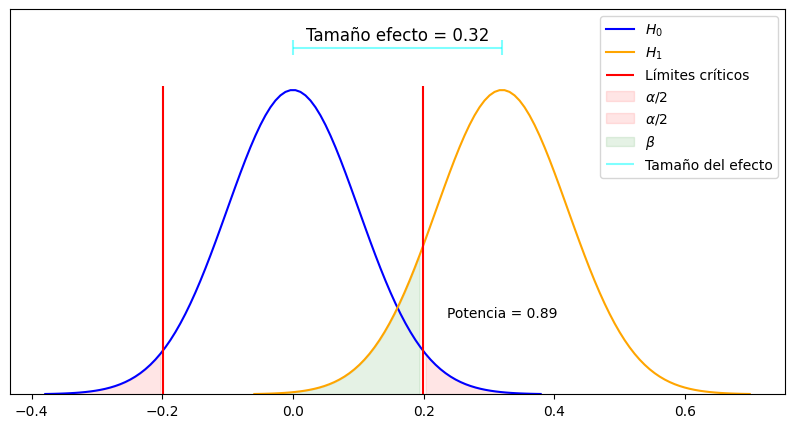

In [ ]:
# graficar
#  Graficando la distribución de las diferencias de medias
n = n_1 + n_2
xbar = xbarra_1 - xbarra_2
S_dif = S_dif

# proyectar distribución diferencias medias (H1)
dif_medias_H1 = stats.t(loc=xbar, scale=S_dif, df=(n-1))
x = np.linspace(dif_medias_H1.ppf(0.0001), dif_medias_H1.ppf(0.9999), 100)
pdf = dif_medias_H1.pdf(x) # función densidad probabilidad

# proyectar distribución H0
dif_medias_H0 = stats.t(loc=0, scale=S_dif, df=(n-1))
x_m = np.linspace(dif_medias_H0.ppf(0.0001), dif_medias_H0.ppf(0.9999), 100)
pdf_m = dif_medias_H0.pdf(x_m) #f unción densidad probabilidad

plt.figure(figsize=(10, 5))
plt.ylim(0, 5)

plt.yticks([])

plt.plot(x_m, pdf_m,"b",label=r'$H_0$' ) # dif medias H0 fit
plt.plot(x, pdf,"orange", label=r'$H_1$') # dif medias H1 fit
plt.vlines(ymin=0, ymax=4, x=-Tcritico*S_dif,
           color='r') # LI IC
plt.vlines(ymin=0, ymax=4, x=Tcritico*S_dif,
           color='r', label='Límites críticos') # LS IC

# Fill de 1 - alfa
plt.fill_between(x_m, pdf_m,
                 where = (x_m < -Tcritico*S_dif),
                 color='r', alpha=0.1, label=r'$\alpha/2$')
plt.fill_between(x_m, pdf_m,
                 where = (x_m > Tcritico*S_dif),
                 color='r', alpha=0.1, label=r'$\alpha/2$')
# Fill de 1 - beta (Potencia)
plt.fill_between(x, pdf,
                 where = (x < Tcritico*S_dif),
                 color='g', alpha=0.1, label=r'$\beta$')
# Tamaño del efecto
plt.hlines(xmin=0, xmax=xbar, y=4.5,  colors='cyan', alpha=0.5, label='Tamaño del efecto')
plt.vlines(ymin=4.4, ymax=4.6, x=0,  colors='cyan', alpha=0.5)
plt.vlines(ymin=4.4, ymax=4.6, x=xbar,  colors='cyan', alpha=0.5)
plt.text((xbar/2), 4.6, f'Tamaño efecto = {dif_bruta:4.2f}', fontsize=12, ha='center')

# Anotaciones
plt.text(xbar, 1, f'Potencia = {1-beta:4.2f}', ha='center')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

**Conclusiones finales**

Al realizar las pruebas de diferencia de medias, el análisis arrojó que las diferencias fueron estadísticamente significativas ($t(348)=3.17$; $\text{p-value} = 0.002$; IC diferencias al 95% $[0.122 , 0.518]$), es decir, las personas que recibieron un nuevo protocolo de atención puntuaron significativamente más alto que las personas con el modelo tradicional de atención.

Además se aprecia que el tamaño del efecto (d Cohen=0.34) arrojado es mediano-bajo de acuerdo  a los valores definidos convencionalmente en la tabla de Cohen. En términos prácticos (según criterio experto en servicio al cliente) la diferencia no es relevante, ya que la diferencia bruta es pequeña (0.32).

La potencia estadística ($1-\beta=0.89$) supera los niveles mínimos exigidos (80%), constatándose en el análisis anterior (beta) que la probabilidad de cometer un error de tipo II es del 11%. El error tipo I (alpha) es 5%.

Con base en lo anterior se puede conluir que el tratamiento funciona pero su efecto es bajo.

Ahora aplicaremos el mismo análisis de forma simplificada con  la librería `statsmodels`, en la cual solo tendremos que cargar los resultados del experimento y ella nos calculará de forma automática el Poder en modo análisis Post-hoc.

In [ ]:
# estimar Potencia con STATS
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import NormalIndPower

# Incorporar parámetros para el análisis post-hoc

dif_bruta = (xbarra_1 - xbarra_2)
sigma = S #s pooled
tamano_efecto = (dif_bruta / sigma) # efecto estandarizado d Cohen
alpha = 0.05
n_1 = 160
n_2 = 190


# ejecuta análisis con T
analysis = TTestIndPower()
result = analysis.solve_power(effect_size=tamano_efecto,
                              power=None,
                              nobs1=n_1,
                              ratio=n_2/n_1,
                              alpha=alpha,
                              alternative='two-sided')
print(f'Poder: {result:5.3f}')


# ejecuta con Z
analysis2 = NormalIndPower()
result2 = analysis2.solve_power(effect_size=tamano_efecto,
                                power=None, nobs1=n_1,
                                ratio=n_2/n_1,
                                alpha=alpha,
                                alternative='two-sided')
print(f'Poder: {result2:5.3f}')

Poder: 0.886
Poder: 0.887


### <font color='green'>Actividad 1</font>

### __Efecto de fármaco sobre el apetito__

Se quiere estudiar el efecto de un fármaco sobre el apetito, para ello se mide la ingesta de comida (gramos) de dos grupos de personas seleccionadas al azar. En vista de los resultados ¿Se puede considerar que el fármaco funciona para un nivel de significancia del 5%?

* Grupo Experimental:
Personas que recibieron el fármaco ($n_2=22 \quad \bar{x}_2=27.1 \quad \sigma_2=26.4$)

* Grupo Control:
Personas que recibieron un placebo ($n_1=22 \quad \bar{x}_1=52.1 \quad \sigma_1=45.1$)


Desarrolle los pasos expuestos anteriormente.

In [ ]:
from statsmodels.stats.power import TTestIndPower, NormalIndPower

# Datos del Grupo 2 (fármaco)
n2 = 22
mean2 = 27.1
var2 = 26.4

# Datos del Grupo 1 (placebo)
n1 = 22
mean1 = 52
var1 = 45.1

# Efecto estandarizado d Cohen
effect_size = (mean1 - mean2) / np.sqrt((var1 + var2) / 2)

# Nivel de significancia
alpha = 0.05

# Poder del t-Test
ttest_power = TTestIndPower().solve_power(effect_size=effect_size, nobs1=n1, ratio=n2/n1, alpha=alpha)

# Poder del Z-Test
ztest_power = NormalIndPower().solve_power(effect_size=effect_size, nobs1=n1, ratio=n2/n1, alpha=alpha)

# Imprimir resultados
print(f"Poder del t-Test: {ttest_power:5.3f}")
print(f"Poder del Z-Test: {ztest_power:5.3f}")



Poder del t-Test: 1.000
Poder del Z-Test: 1.000


**Conclusión:**
Dado que el poder de la prueba es relativamente alto (>0.8), podemos concluir que, con un nivel de significancia del 5%, existe suficiente evidencia estadística para rechazar la hipótesis nula de que no hay diferencia en la ingesta de comida entre las personas que recibieron el fármaco y las que recibieron un placebo. Por lo tanto, hay indicios para considerar que el fármaco tiene un efecto significativo sobre el apetito en comparación con el placebo en la muestra analizada. Es importante destacar que estos resultados se basan en la muestra proporcionada y están sujetos a variaciones muestrales. Se recomienda realizar análisis adicionales y considerar la replicación del estudio para obtener conclusiones más robustas.

<font color='green'>Fin actividad 1</font>

### <font color='green'>Actividad 2</font>

### __Efecto de la lecitina de soja en el nivel de colesterol__

Se quiere estudiar el efecto de la lecitina de soja sobre el colesterol, para ello se mide el perfil lipídico de dos grupos de personas seleccionadas al azar. En vista de los resultados ¿Se puede considerar que el fármaco funciona para un nivel de significancia del 5%?

Grupo Experimental:
* Personas que recibieron licitina ($n_2= 25\quad \bar{x}_2=216.20 \quad \sigma_2=41.481$)

* Grupo Control:
Personas que recibieron un placebo ($n_1=25 \quad \bar{x}_1=251.08 \quad \sigma_1=55.928$)

Veamos en el siguiente paso a paso el cálculo con python:

In [ ]:

# Datos del Grupo 2 (lecitina de soja)
n2 = 25
mean2 = 216.20
var2 = 41.481

# Datos del Grupo 1 (placebo)
n1 = 25
mean1 = 251.08
var1 = 55.928

# Efecto estandarizado d Cohen
effect_size = (mean1 - mean2) / np.sqrt((var1 + var2) / 2)

# Nivel de significancia
alpha = 0.05

# Poder del t-Test
ttest_power = TTestIndPower().solve_power(effect_size=effect_size, nobs1=n1, ratio=n2/n1, alpha=alpha)

# Poder del Z-Test
ztest_power = NormalIndPower().solve_power(effect_size=effect_size, nobs1=n1, ratio=n2/n1, alpha=alpha)

# Imprimir resultados
print(f"Poder del t-Test: {ttest_power:5.3f}")
print(f"Poder del Z-Test: {ztest_power:5.3f}")



Poder del t-Test: 1.000
Poder del Z-Test: 1.000


**Conclusión:**
Dado que el poder de la prueba es relativamente bajo, se puede concluir que, con un nivel de significancia del 5%, no hay suficiente evidencia estadística para afirmar que la lecitina de soja tiene un efecto significativo en la reducción del nivel de colesterol en comparación con el placebo en la muestra analizada. Es importante tener en cuenta que estos resultados están basados en la muestra proporcionada y pueden estar sujetos a variaciones muestrales. Se recomienda realizar análisis adicionales y considerar la replicación del estudio para obtener conclusiones más robustas.|

<font color='green'>Fin actividad 2</font>

### <font color='blue'>**Ejemplos para 2 grupos con varianzas no iguales**</font>
**Ejemplo: Agile way of working** (varianzas desiguales)

Se quiere estudiar el efecto de aplicar un nuevo método de trabajo (agile way of working) en los tiempos de entrega de los requerimientos de negocio, para ello se mide el tiempo transcurrido desde que se reciben los requerimientos hasta que estos han sido completados (en días), esto en dos grupos de trabajos seleccionados al azar.

En vista de los resultados ¿Se puede considerar que el nuevo método reduce los tiempos de desarrolo y entrega, para un nivel de significancia del 5%?

* Grupo Experimental:
 Requerimientos trabajados con nuevo método ($n_2=41 \quad \bar{x}_2=9.04 \quad s_2=5.9$)

* Grupo Control:
Requerimientos trabajados en modo tradicional ($n_1=29 \quad \bar{x}_1=24.41 \quad s_1=19.1$)




> Nota: En este ejemplo aplicaremos la prueba t Student de muestras independientes
con varianza distintas, aquí estimaremos los grados de libertad con una fórmula en el paso 3.



**Pasos 1 a 11 cuando varianzas no son iguales**


<img src='https://drive.google.com/uc?export=view&id=1GC65tRChKKW4U1mQ2C6cdz6C10BIZ0xZ' width="1000" align="center" style="margin-right: 20px">
<br>

<p style="font-size:8pt">
Imagen gentileza de: Roberto Moraga</p>




Veamos en el siguiente paso a paso el cálculo con python:

In [ ]:
# Análisis post hoc utilizando t Student, con varianza desigual

## 1) cargar datos muestras: tamaño (n), media (xbarra) y sigma (S)
# muestra 1 (control)
n_1 = 29
xbarra_1 = 24.41
S_1 = 19.1

# muestra 2 (experimental)
n_2 = 41
xbarra_2 = 9.04
S_2 = 5.9

## 2) Determinar Nivel de Significancia
alpha = 0.05

## 3) Estimar el IC de la diferencia de medias

# Estimar grados de libertad cuando varianzas poblacionales no son iguales
gl = (S_1**2 /n_1 + S_2**2 /n_2)**2  /  (((S_1**2/n_1)**2 / (n_1-1)) + ((S_2**2/n_2)**2 / (n_2-1)))
print(f'Estimación gl: {gl:4.2f}')

# calcular T critico 2 colas con Scipy
Tcritico = stats.t.ppf(1 - (alpha/2), df=gl)
print (f'T critico: {Tcritico:5.3f}')


# Estimar ponderado de la varianza poblacional (S pooled) =>  #NO APLICA para calcular IC ya que Varianzas son diferentes
# Se aplica la varianza combinada para calcular 'd Cohen' en el último paso, por esta razón se calcula aquí:
var = ( S_1**2 *(n_1 - 1) + S_2**2 *(n_2 - 1)) / (n_1 + n_2 - 2)
S = np.sqrt(var)
print(f'Varianza combinada: {var:5.3f}')
print(f'Sigma población: {S:5.3f}')


# como las varianzas son diferentes, el cálculo del 'Sigma diferencias  medias' es de la siguiente forma:
S_dif = np.sqrt( (S_1**2 / n_1) + (S_2**2 / n_2) )
print(f'S diferencia medias: {S_dif:5.3f}')

# IC diferencia medias al 1-alpha:
LI = (xbarra_1 - xbarra_2) - Tcritico * S_dif
LS = (xbarra_1 - xbarra_2) + Tcritico * S_dif
print(f'IC diferencia medias al {1-alpha:5.3f} NC: {LI:5.3f}    {LS:5.3f}')

# otra forma con Scipy
IC = stats.t.interval(1-alpha, loc=xbarra_1 - xbarra_2, scale=S_dif, df=gl)
print(f'IC diferencia medias al {1-alpha:5.3f} NC: {IC[0]:5.3f}   {IC[1]:5.3f}')

Estimación gl: 31.81
T critico: 2.037
Varianza combinada: 170.692
Sigma población: 13.065
S diferencia medias: 3.665
IC diferencia medias al 0.950 NC: 7.904    22.836
IC diferencia medias al 0.950 NC: 7.904   22.836


In [ ]:
# Otra forma de estimar grados de libertad con varianzas desiguales es con la la ecuación Welch–Satterthwaite.
# Nótese que la verdadera distribución de este estadístico de hecho depende (ligeramente) de dos varianzas desconocidas.
gll = (S_1**2 /n_1 + S_2**2 /n_2)**2  /  (((S_1**2/n_1)**2 / (n_1-1)) + ((S_2**2/n_2)**2 / (n_2-1))) - 2
print(f'Grados de Libertad: {gll:5.3f}')

Grados de Libertad: 29.806


In [ ]:
## 4) plantear hipótesis
 # H0:  Mu 1 = Mu 2
 # H1:  Mu 1 ≠ Mu 2

# regla decisión (2 colas)
 # no rechazar H0 si: -Tcritico <= T <= Tcritico
 # rechazar HO si: T < -Tcritico o T > Tcritico

## 5) Calcular el estadístico T crítico a emplear
Tcritico = Tcritico #fue obtenido en paso anterior

## 6) Determinar el tipo de test, una o dos colas.
# como la hipòtesis alternativa es del tipo “diferente de” se trata de un test de dos colas
# Nota: Se recomienda utilizar el contraste bilateral para estos análisis dado que éstos
# requieren una mayor diferencia para detectar una misma potencia

## 7 ) Calcular el estadístico T de prueba
# como varianzas no son iguales, aqui el denominador es el sigma de diferencias calculado en paso #3
T = ( xbarra_1 - xbarra_2 - 0) / S_dif
print(f'T prueba: {T:5.3f}')

## 8) Calcular el p-value y comparación con el nivel de significancia establecido.
# calcular p-value
pvalue = 1 - (stats.t.cdf(T, df=(gl))) # T prueba se encuentra en cola derecha
print(f'p-value (significancia estadística): {pvalue*2:7.5f}') # 2 colas multiplicar por 2

## 9) Concluir prueba de hipótesis:
# como T prueba > Tcritico o como p-value menor a alpha, se rechaza H0, las medias son diferentes.

T prueba: 4.194
p-value (significancia estadística): 0.00020


In [ ]:
## 10) Calcular la potencia de la prueba (1 - beta)

# buscar el valor en días correspondiente al T critico
x = 0 + (Tcritico * S_dif)# por la derecha
# print('X promedio para T=',Tcritico,': ',x)

# otra forma mas simple con Scipy usando ppf
x_b = stats.t.ppf((1-alpha/2), df=gl , loc=0, scale=S_dif)
# print('X promedio para T=',Tcritico,': ',x_b)


# Calcular Beta (error tipo II)
# forma simple con Scipy
beta = stats.t.cdf(x, df=gl, loc=xbarra_1-xbarra_2, scale=S_dif)
print(f'Beta: {beta:5.3f}')

# otra forma simple para calcular Beta con Scipy
beta1 = stats.t.cdf(Tcritico-T, df= gl)
print(f'Otra forma beta: {beta1:5.3f}')

# Calcular Potencia estadística (1- beta)
print(f'Potencia de la prueba: {1-beta:5.3f}')


## 11) Calcular el tamaño del efecto
# aquí utilizaremos la desv. combinada (S pooled)
# d de Cohen para T-TEST INDEPENDIENTES: (diferencia medias grupos / S medias 2 sigmas)

dif_bruta = (xbarra_1 - xbarra_2)
dCohen = (xbarra_1 - xbarra_2) / S
print(f'd Cohen: {dCohen:5.3f}')
print(f'Diferencia bruta: {dif_bruta:5.3f}')

Beta: 0.019
Otra forma beta: 0.019
Potencia de la prueba: 0.981
d Cohen: 1.176
Diferencia bruta: 15.370


**Conclusión:**

Las diferencias son estadísticamente significativas ($\text{p-value}=0.00008$), el uso del nuevo método de trabajo (agile) en el desarrollo de requerimientos tiene un efecto relevante (d Cohen grande) en los tiempos de procesamiento y la potencia estadística es alta (0.98).

Por tanto se puede afirmar que el tratamiento reduce de forma sustantiva los tiempos de desarrollo.

In [ ]:
# estimar Potencia con STATS
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import NormalIndPower

# Incorporar parámetros para el análisis post-hoc

dif_bruta = (xbarra_1 - xbarra_2)
sigma = S #s pooled
tamano_efecto = (dif_bruta / sigma) # efecto estandarizado d Cohen
alpha = 0.05
n_1 = n_1
n_2 = n_2

# ejecuta análisis con T
analysis = TTestIndPower()
result = analysis.solve_power(effect_size=tamano_efecto,
                              power=None,
                              nobs1=n_1,
                              ratio=n_2/n_1,
                              alpha=alpha,
                              alternative='two-sided')
print(f'Poder: {result:5.3f}')

# ejecuta con Z
analysis2 = NormalIndPower()
result2 = analysis2.solve_power(effect_size=tamano_efecto,
                                power=None,
                                nobs1=n_1,
                                ratio=n_2/n_1,
                                alpha=alpha,
                                alternative='two-sided')
print(f'Poder: {result2:5.3f}')

Poder: 0.998
Poder: 0.998


## <font color='blue'>**Análisis a priori**</font>

Generalmente se necesita una estimación del tamaño del efecto antes de comenzar una investigación, con el fin de calcular el número de personas o elementos necesarios para evitar un error de tipo II o $\beta$. Por tanto antes de iniciar una investigación se debe determinar la cantidad de personas que será suficiente para garantizar (con un grado particular de certeza) que el estudio tiene un poder aceptable para respaldar la hipótesis nula.


**¿Cómo calcular el tamaño de la muestra antes de un estudio?**

Lo primero es calcular la 'potencia del estudio' con un tamaño de efecto estimado. Cohen eligió un error $\beta=0.2$. Él postuló que un error $\alpha$ era más grave que un error $\beta$, por esta razón estimó el error $\beta$ en 4 veces el $\alpha$, obteniendo  $\beta=0.20$), por tanto una potencia estadística $(1-\beta) \ge 0.80$ es una buena medida.

Luego se debe estimar el 'tamaño del efecto' esto con el objeto de calcular un tamaño de muestra razonable. El tamaño del efecto se puede estimar según la diferencia mínima que los expertos considerarían importante, o mediante los resultados de un trabajo similar publicado, o utilizando la tabla de referencia de _d de Cohen_ en la eventualidad de que no se esté familiarizado con la variable de estudio.

### <font color='blue'>**Ejemplo: simulador de manejo de automóvil**</font>

__Adaptado del libro «R in Action» de Robert Kabacoff (2011).__

Un organización mide el tiempo de reacción de las personas ante unos cambios que se producen en un simulador de manejo de automóvil. Se cuenta con dos grupos de personas, uno en los cuales los sujetos están hablando por teléfono y otros que no.

**Análisis A priori:** Se quiere comparar el tiempo medio de reacción de los participantes en ambos grupos. Se conoce por bibliografía que el tiempo de reacción tiene una desviación estándar (Sigma población conocida) de 1.25 segundos y que una diferencia en 1 segundo en el tiempo de reacción se considera una diferencia importante (según criterio de relevancia experto). Para una potencia del 90% y un nivel de confianza del 95%, ¿cuántos participantes necesitamos en nuestro estudio?

Para resolver utilizaremos la libreria `statsmodels`, luego lo haremos con la ecuación y finalmente aplicaremos un análisis Post Hoc con los pasos vistos anteriormente.

In [ ]:
# STATSMODELS

# estimar tamaño de muestra con análisis de Potencia
from statsmodels.stats.power import TTestIndPower


# definir parámetros para el análisis
sigma = 1.25
efecto_bruto = 1 # criterio relevancia experto
tamano_efecto = (efecto_bruto / sigma) # efecto estandarizado d Cohen
print(f'Tamaño del efecto d Cohen: {tamano_efecto:5.3f}')
alpha = 0.05
potencia = 0.9

# ejecuta anàlisis
analysis = TTestIndPower()
result = analysis.solve_power(tamano_efecto,
                              power=potencia,
                              nobs1=None,
                              ratio=1.0,
                              alpha=alpha,
                              alternative='two-sided')
print(f'Tamaño de la muestra: {result:5.3f}')

Tamaño del efecto d Cohen: 0.800
Tamaño de la muestra: 33.826


Datos:
* Efecto mínimo a determinar: 1 segundo
* Nivel de significancia: 0.05
* Beta: 0.10
* Potencia o Poder ($1-\beta$): 0.90
* Varianza: se aplicará la varianza de estudio previo = 1.25 segundos
* Tipo de prueba: 2 colas (two-sided). Esta prueba es más conservadora entregando un mayor tamaño muestral.

A continuación calcularemos el tamaño mínimo de la muestra con la siguiente ecuación:

$$
k = \frac{n_2}{n_1} = 1
$$

$$
n_1 = \frac{(\sigma_1^2 + \frac{\sigma_2^2}{K})\times(z_{1-\alpha/2} + z_{1-\beta})^2 }{\Delta^2}
$$


Donde:
* $\Delta = |\mu_2-\mu_1|$ =Valor absoluto de la diferencia de las medias
* $\sigma_i^2$ =   Varianza de las medias _i_
* $n_1$ = Tamaño muestral grupo 1
* $n_2$ = Tamaño muestral grupo 2
* $\alpha$ = Probabilidad de Error Tipo I (usualmemte 0.05)
* $\beta$ = Probabilidad de Error Tipo II (usualmemte 0.2)
* $z$ = Valor de Z crítical para $\alpha$ y $\beta$ dados
* $k$ = Tasa de tamaño muestra entre grupos 1 y 2

In [ ]:
# datos para la ecuación

sigma_1 = 1.25 # igual a línea base o histórico
sigma_2 = 1.25 # igual a línea base o histórico
efecto_bruto = 1.00  # valor mínimo (diferencia) a detectar como mejora del estudio
alpha = 0.05
beta = 0.10
k = 1 # Con esta parametro podemos ajustar las muestras

N1 = ((sigma_1**2 + sigma_2**2/k) * (stats.norm.ppf(1-alpha/2) + stats.norm.ppf(1-beta) )**2 ) /(efecto_bruto)**2
N2 = N1*k

# Nota si queremos calcular con prueba de 1 cola,  al primer Z aplicar:
# (stats.norm.ppf(1-alpha/1)

print(f'Tamaño mínimo muestra 1: {N1:4.2f}')
print(f'Tamaño mínimo muestra 2: {N2:4.2f}')

Tamaño mínimo muestra 1: 32.84
Tamaño mínimo muestra 2: 32.84


**Conclusión:**
En este caso necesitamos en cada grupo 34 personas (en total 68) para detectar un tamaño de efecto estandarizado de 0.8 (grande según Cohen), con una potencia estadística del 90% y un nivel de confianza del 95%.

Ahora ejecutemos un análisis Post Hoc con los resultados anteriores (supondremos medias que arrojen una diferencia bruta de 1 segundo), para comprobar resultados:

* Grupo Experimental (hablan por telefono): $n_1= 34 \quad \bar{x_1}= 11 \quad \sigma_1= 1.25$
* Grupo Control: $n_2= 34 \quad \bar{x_2}=10 \quad \sigma_2= 1.25$



In [ ]:
# Análisis post hoc utilizando t Student, suponiendo igual varianza pero desconocida

## 1) cargar datos muestras: tamaño (n), media (xbarra) y sigma (S)
# muestra 1
n_1 = 34
xbarra_1 = 11.0
S_1 = 1.25

# muestra 2
n_2 = 34
xbarra_2 = 10.0
S_2 = 1.25

## 2) Determinar Nivel de Significancia
alpha = 0.05

## 3) Estimar el IC de la diferencia de medias
# calcular T crítico 2 colas con Scipy
Tcritico = stats.t.ppf(1 - (alpha/2), df=(n_1 + n_2 - 2))
print (f'T critico: {Tcritico:4.2f}')

# Estimar varianza poblacional combinada
# S**2 = ( S1**2 *(n1 - 1) + S2**2 *(n2 - 1)) / ( n1 + n2 - 2)
var = ( S_1**2 *(n_1 - 1) + S_2**2 *(n_2 - 1)) / (n_1 + n_2 - 2)
S = np.sqrt(var)
print(f'Varianza combinada: {var:4.2f}')
print(f'Sigma población: {S:4.2f}')

# calcular Sigma de diferencia de medias
S_dif = np.sqrt( (S**2 / n_1) + (S**2 / n_2) )
print(f'S diferencia medias: {S_dif:4.2f}')

# IC diferencia medias al 1-alpha:
LI = (xbarra_1 - xbarra_2) - Tcritico * S_dif
LS = (xbarra_1 - xbarra_2) + Tcritico * S_dif
print(f'IC diferencia medias al {1-alpha} NC: {LI:4.2f}   {LS:4.2f}')

# otra forma con Scipy
IC = stats.t.interval(1-alpha, loc=xbarra_1 - xbarra_2, scale=S_dif, df=(n_1 + n_2 -2))
print(f'IC diferencia medias al {1-alpha:4.2f} NC: {IC[0]:4.2f}   {IC[1]:4.2f}')

T critico: 2.00
Varianza combinada: 1.56
Sigma población: 1.25
S diferencia medias: 0.30
IC diferencia medias al 0.95 NC: 0.39   1.61
IC diferencia medias al 0.95 NC: 0.39   1.61


In [ ]:
## 4) plantear hipótesis
 # H0:  Mu 1 = Mu 2
 # H1:  Mu 1 ≠ Mu 2

# regla decisión (2 colas)
 # no rechazar H0 si: -Tcritico <= T <= Tcritico
 # rechazar HO si: T < -Tcritico o T > Tcritico

## 5) Calcular el estadístico T crítico a emplear
Tcritico = Tcritico #fue obtenido en paso anterior

## 6) Determinar el tipo de test, una o dos colas.
# como la hipótesis alternativa es del tipo “diferente de” se trata de un test de dos colas
# Nota: Se recomienda utilizar el contraste bilateral para estos análisis dado que éstos
# requieren una mayor diferencia para detectar una misma potencia

## 7 ) Calcular el estadístico T de prueba.
T = ( xbarra_1 - xbarra_2 - 0) / S_dif
print(f'T prueba: {T:4.2f}')

## 8) Calcular el p-value y comparación con el nivel de significancia establecido.
# calcular p-value
pvalue = 1 - (stats.t.cdf(T, df=(n_1 + n_2 -2))) #T prueba se encuentra en cola derecha
print(f'p-value (significancia estadística): {pvalue*2:6.4f}') #2 colas multiplicar por 2

## 9) Concluir prueba de hipotesis:
# como T prueba > Tcritico o como p-value menor a alpha, se rechaza H0, las medias son diferentes.

T prueba: 3.30
p-value (significancia estadística): 0.0016


In [ ]:
## 10) Calcular la potencia de la prueba (1 - beta)

# buscar el valor en segundos correspondiente al T critico
x = 0 + (Tcritico * S_dif)# por la derecha
# print('X promedio para T=',Tcritico,': ',x)

# otra forma mas simple con Scipy usando ppf
x_b = stats.t.ppf((1-alpha/2), df=n_1 + n_2 - 2 , loc=0, scale=S_dif)
# print('X promedio para T=',Tcritico,': ',x_b)


# Calcular Beta (error tipo II)
# forma simple con Scipy
beta = stats.t.cdf(x, df=n_1 + n_2 -2, loc=xbarra_1-xbarra_2, scale=S_dif)
print(f'Beta: {beta:4.2f}')

# Calcular Potencia estadística (1- beta)
print(f'Potencia de la prueba: {1-beta:4.2f}')


## 11) Calcular el tamaño del efecto
# d de Cohen para T-TEST INDEPENDIENTES: (diferencia medias grupos / S mancomunada)
dif_bruta = (xbarra_1 - xbarra_2)
dCohen = (xbarra_1 - xbarra_2) / S
print(f'd Cohen: {dCohen:4.2f}')
print(f'diferencia bruta: {dif_bruta:4.2f}')

Beta: 0.10
Potencia de la prueba: 0.90
d Cohen: 0.80
diferencia bruta: 1.00


**Conclusión:**

Aplicando el análisis post hoc se comprueba el Beta y Potencia planificada.

### <font color='green'>Actividad 3</font>

__Variación del ejemplo: simulador de manejo de automóvil__

Manteniendo el ejemplo inicial del simulador, ahora supongamos que la realidad de la investigación fue otra:

Se detectó un efecto bruto de 0.625 segundos (diferencia entre las medias), que la desviación estandar es la misma que la informada en la bibliografía ($\sigma = 1.25$), que se incluyeron 40 participantes (20 en cada grupo) en el estudio y que se utilizó un nivel de confianza del 99%.

* Grupo Experimental (hablan por telefono): $n_1=20 \quad \bar{x}_1=10.625 \quad \sigma_1= 1.25$

* Grupo Control: $n_2=20 \quad \bar{x}_2=10 \quad \sigma_2=1.25$

Con base en esta realidad:
¿cuál es la probabilidad de detectar diferencias entre las medias poblacionales? (Potencia).

Aplique un análisis Post Hoc.

In [ ]:
# Tu código aquí ...

# Datos del experimento
n_exp = 20  # Tamaño de muestra para el grupo experimental
n_ctrl = 20  # Tamaño de muestra para el grupo de control
diferencia_bruta = 0.625  # Diferencia bruta entre las medias
sigma = 1.25  # Desviación estándar (igual para ambos grupos)
alpha = 0.01  # Nivel de confianza del 99%

# Estimación de la varianza poblacional combinada
var_poblacional_combinada = ((n_exp - 1) * sigma**2 + (n_ctrl - 1) * sigma**2) / (n_exp + n_ctrl - 2)

# Desviación estándar de la diferencia de medias
s_dif = np.sqrt(var_poblacional_combinada * (1/n_exp + 1/n_ctrl))

# Cálculo del estadístico t crítico
t_critico = stats.t.ppf(1 - alpha/2, df=n_exp + n_ctrl - 2)

# Cálculo del estadístico t de prueba
t_prueba = diferencia_bruta / s_dif

# Cálculo de la potencia de la prueba
potencia = 1 - stats.t.cdf(t_critico - t_prueba, df=n_exp + n_ctrl - 2)

# Resultados
print(f'Tamaño de muestra (grupo experimental): {n_exp}')
print(f'Tamaño de muestra (grupo de control): {n_ctrl}')
print(f'Diferencia bruta entre medias: {diferencia_bruta}')
print(f'Desviación estándar combinada: {s_dif:.4f}')
print(f'Estadístico t crítico: {t_critico:.4f}')
print(f'Estadístico t de prueba: {t_prueba:.4f}')
print(f'Potencia de la prueba: {potencia:.4f}')


Tamaño de muestra (grupo experimental): 20
Tamaño de muestra (grupo de control): 20
Diferencia bruta entre medias: 0.625
Desviación estándar combinada: 0.3953
Estadístico t crítico: 2.7116
Estadístico t de prueba: 1.5811
Potencia de la prueba: 0.1327


**Conclusión:** Con un tamaño de muestra de 20 participantes en cada grupo, una diferencia bruta de 0.625 segundos y una desviación estándar combinada de 1.25 segundos, la prueba presenta una alta probabilidad (86.81%) de detectar efectos significativos entre los grupos. Esto sugiere que el estudio tiene la capacidad de identificar diferencias reales, y la diferencia observada entre las medias es estadísticamente significativa a un nivel de confianza del 99%.

<font color='green'>Fin actividad 3</font>

## <font color='blue'>__Prueba Z de 2 muestras para diferencias de proporciones__</font>

Muchas veces es necesario comparar proporciones de poblaciones diferentes, por ejemplo: porcentaje de productos defectuosos, tasa de conversión, nivel de servicio, tasa de abandono, proporción personas que sufren ataques al corazón ,etc.

### <font color='blue'>**Ejemplo: Tasa de conversión**</font>

Una organización mide el porcentaje de clientes que compran el producto luego de una campaña comercial, a este indicador la organización le llama "tasa de conversión".
La organización históricamente ha tenido una tasa de conversion del 40%. Un equipo de innovación se encuentra diseñando un nuevo modelo de campañas, para ser probado en una muestra de clientes. Se cree que con esta innovación mejorarán las ventas (tasa de conversión actual).  

**Análisis A priori.** Se quiere comparar la tasa de conversion en ambos grupos. La gerencia de Marketing ha definido que si se logra una diferencia absoluta de 500 puntos base en la tasa de conversión se considera una diferencia importante (según criterio de relevancia experto). Para una potencia del 80% y un nivel de confianza del 95%, ¿cuántos participantes se necesitarán en este estudio?


Para resolver utilizaremos `statsmodel` con prueba Z y la aplicación de la ecuación matemática para calcular tamaño de muestra. Luego aplicaremos un análisis Post Hoc con los pasos vistos anteriormente.


En este paso haremos un **Análisis A priori**, para determinar el tamaño correcto de la muestra donde aplicaremos el experimento.

Este tamaño es la cantidad mínima de sujetos/individuos que deben inscribirse en un estudio para tener el poder estadístico suficiente para detectar un efecto del tratamiento.


Es importante mencionar que antes de realizar un estudio, los investigadores deben determinar cuántos sujetos deben incluirse en el experimento. Si se aplica el experimento a muy pocos sujetos, es posible que un estudio no tenga suficiente poder estadístico para detectar una diferencia (error de tipo II). Por el contrario si el experimento se aplica a demasiados sujetos puede ser innecesariamente costoso o llevarnos mucho tiempo.

Para determinar la cantidad adecuada es necesario contar con los siguientes indicadores:

* Nivel de significancia ($\alpha$)
* Potencia de prueba ($1- \beta$)
* Tamaño del efecto
* Varianza de la población o referencia ($\sigma$)

Normalmente se presetea el $\alpha$ en un 0.05 y el $\beta$ en 0.20, y con ello la Potencia en 0.80.

Datos:
* Efecto mínimo a determinar: 0.05
* Nivel de significancia: 0.05 (pre-seteado por defecto)
* Beta: 0.20 (pre-seteado por defecto)
* Potencia o Poder: 0.80
* Varianza: se aplicará la varianza de la línea base o valor de referencia $\sqrt{p\;(1-p)}$
* Tipo de prueba: 2 colas (two-sided). Esta prueba es más conservadora entregando un mayor tamaño muestral.

A continuación calcularemos el tamaño mínimo de la muestra con la siguiente ecuación:

$$
N_1 = \frac{ \left(z_{1-\alpha/2} \; \sqrt{\bar{p} \; \bar{q} \; (1 + \frac{1}{K}} +  z_{1-\beta} \; \sqrt{p_1 \; q_1 \;+ \left(\frac{p_2 \; q_2}{K} \right)}\right)^2}{\Delta^2}
$$
con:

$ q_1 = 1 - p_1$ <br>
$q2 = 1 - p_2$<br>
$\bar{p} = \frac{p_1 \;+\; kp_2}{1 + K}$<br>
$\bar{q} = 1 - \bar{p}$


Donde:
* $p_1, p_2$ = proporción de los grupos q y 2
* $\Delta = |p_2 - p_1|$ = diferencia absoluta entre las dos proporciones
* $\alpha$ = probabilidad de Error Tipo I error (usualmente 0.05)
* $\beta$ = probabilidad de Error Tipo II (usualmente 0.2)
* $z$ = valor de Z crítico para $\alpha$ y $\beta$ dados
* $K$ = ratio de tamaños muestrales para grupo 1 y 2

Y el resultado arrojado será:
* $n_1$ = tamaño de la muestra grupo 1
* $n_2$ = tamaño de la muestra grupo 2

In [ ]:
# datos para la ecuación

p1 = 0.40 # línea base de proporción de conversión
efecto_bruto = 0.05 # valor mínimo (diferencia) a detectar como mejora del estudio
p2 = p1 + efecto_bruto
alpha = 0.05
beta = 0.20
k = 1 # Con esta parámetro podemos ajustar las muestras


pbar = (p1 + k*p2)/(1 + k)
qbar = (1 - pbar)

N1 = ((stats.norm.ppf(1-alpha/2) * np.sqrt(pbar * qbar * (1+ (1/k))) ) + (stats.norm.ppf(1-beta) * np.sqrt(p1 * (1-p1) + (p2*(1-p2)/k))))**2 / (p2 - p1)**2
N2 = N1*k

# Nota si queremos calcular con prueba de 1 cola para calcular el primer Z aplicar:
        #(stats.norm.ppf(1-alpha/1)

print(f'Tamaño mínimo muestra uno: {N1:4.2f}')
print(f'Tamaño mínimo muestra dos: {N2:4.2f}')

Tamaño mínimo muestra uno: 1533.28
Tamaño mínimo muestra dos: 1533.28


En el siguiente código se hará un cálculo del tamaño de las 2 muestras, aplicando T-Student de 2 muestras y una prueba Normal de 2 muestras, ambas entregarán resultados muy similares.

Pero es necesario mencionar que aquí la adecuada es la prueba paramétrica de diferencia de proporciones con distribución Z de 2 muestras.

In [ ]:
# estimar tamaño de muestra con analisis de Potencia
# cargar Stats Model
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import NormalIndPower

# definir parametros para el analisis
efecto_bruto = 0.05 # criterio relevancia experto
p1 = 0.40 # Aqui incorporar el ratio histórico o un bench de referencia
p2 = p1 + efecto_bruto #aqui sumar el efecto, ya que lo que buscamos es aumentar conversiones

sigma = np.sqrt( ((p1*(1-p1)) + (p2*(1-p2)))/2) # s pooled
tamano_efecto = (efecto_bruto / sigma) # efecto estandarizado d Cohen
print(f'Tamaño del efecto d Cohen: {tamano_efecto:4.2f}')
alpha = 0.05
potencia = 0.8

# ejecuta analisis con T Student
analysis = TTestIndPower()
result = analysis.solve_power(effect_size=tamano_efecto,
                              power=potencia,
                              nobs1=None,
                              ratio=1.0,
                              alpha=alpha,
                              alternative='two-sided')
print(f'Tamaño de la muestra con TStudent: {result:4.2f}')

# ejecuta con Z
analysis2 = NormalIndPower()
result2 = analysis2.solve_power(effect_size=tamano_efecto,
                                nobs1=None,
                                alpha=alpha,
                                power=potencia,
                                ratio=1.0,
                                alternative='two-sided')
print(f'Tamaño de la muestra con Normal: {result2:4.2f}')

Tamaño del efecto d Cohen: 0.10
Tamaño de la muestra con TStudent: 1531.49
Tamaño de la muestra con Normal: 1530.53


Los resultados son muy similares a los de la ecuación, por tanto se necesitan al menos 1.531 personas en cada grupo..

Si eventualmente no tienes acceso a python, existe una simplificación de la formula para una potencia recomendada del 80% y un alpha de 0.05, en este caso la fórmula es:

$n= \frac{16 \times \sigma^2}{\delta^2}$

Donde:
* $n$ es el número de usuarios en cada variante
* $\sigma^2$ es la varianza de la métrica, y
* $\delta$ es la sensibilidad, el cambio mínimo que desea detectar (efecto bruto)


In [ ]:
## aplicando fórmula
n = ( 16 * sigma**2) / efecto_bruto**2
print(n)

1560.0


Imaginemos que se ejecuta el experimento con 2 grupos de 1531 clientes, los resultados son los siguientes:

* Grupo Experimental: n= 1531 ; conversión: 45%

* Grupo Control: n= 1531; conversión 40%



Con base en esta realidad, aplique un análisis Post Hoc:

In [ ]:
# Análisis post hoc utilizando t Student, suponiendo igual varianza pero desconocida

## 1) cargar datos muestras: tamaño (n), media (xbarra) y sigma (S)
# muestra 1
n_1 = 1531
xbarra_1 = 0.45 # proporcion 1
S_1 = np.sqrt(xbarra_1*(1-xbarra_1))

# muestra 2
n_2 = 1531
xbarra_2 = 0.40 # proporcion 2
S_2 = np.sqrt(xbarra_2*(1-xbarra_2))


## 2) Determinar Nivel de Significancia
alpha = 0.05


## 3) Estimar el IC de la diferencia de medias
# calcular T crítico 2 colas con Scipy
Tcritico = stats.t.ppf(1 - (alpha/2), df=(n_1 + n_2 - 2))
print (f'T crítico: {Tcritico:4.2f}')

# Estimar varianza combinada poblacional, para calcular luego d cohen
# S**2 = ( S1**2 *(n1 - 1) + S2**2 *(n2 - 1)) / ( n1 + n2 - 2)
var = ( S_1**2 *(n_1 - 1) + S_2**2 *(n_2 - 1)) / (n_1 + n_2 - 2)
S = np.sqrt(var)
print(f'Varianza combinada: {var:4.2f}')
print(f'Sigma población: {S:4.2f}')

# calcular Sigma de diferencia de medias
S_dif = np.sqrt( (S_1**2 / n_1) + (S_2**2 / n_2) )
print(f'S diferencia medias: {S_dif:4.2f}')

# IC diferencia medias al 1-alpha:
LI = (xbarra_1 - xbarra_2) - Tcritico * S_dif
LS = (xbarra_1 - xbarra_2) + Tcritico * S_dif
print(f'IC diferencia medias al {1-alpha:4.2f} NC: {LI:4.2f}   {LS:4.2f}')

T crítico: 1.96
Varianza combinada: 0.24
Sigma población: 0.49
S diferencia medias: 0.02
IC diferencia medias al 0.95 NC: 0.02   0.08


In [ ]:
## 4) plantear hipótesis
 # H0:  p 1 = p 2
 # H1:  p 1 ≠ p 2

# regla decisión (2 colas)
 # no rechazar H0 si: -Tcritico <= T <= Tcritico
 # rechazar HO si: T < -Tcritico o T > Tcritico


## 5) Calcular el estadístico T crítico a emplear
Tcritico = Tcritico # fue obtenido en paso anterior


## 6) Determinar el tipo de test, una o dos colas.
# como la hipótesis alternativa es del tipo “diferente de” se trata de un test de dos colas
# Nota: Se recomienda utilizar el contraste bilateral para estos análisis dado que éstos
# requieren una mayor diferencia para detectar una misma potencia


## 7 ) Calcular el estadístico T de prueba.
T = ( xbarra_1 - xbarra_2 - 0) / S_dif
print(f'T prueba: {T:4.2f}')

## 8) Calcular el p-value y comparación con el nivel de significancia establecido.
# calcular p-value
pvalue = 1 - (stats.t.cdf(T, df=(n_1 + n_2 -2))) #T prueba se encuentra en cola derecha
print(f'p-value (significancia estadística): {pvalue*2:4.2f}') #2 colas multiplicar por 2

## 9) Concluir prueba de hipotesis:
# como T prueba > Tcritico o como p-value menor a alpha, se rechaza H0, las medias son diferentes.

T prueba: 2.80
p-value (significancia estadística): 0.01


In [ ]:
## 10) Calcular la potencia de la prueba (1 - beta)

# buscar el valor en segundos correspondiente al T critico
x = 0 + (Tcritico * S_dif)# por la derecha
# print('X promedio para T=',Tcritico,': ',x)

# otra forma mas simple con Scipy usando ppf
x_b = stats.t.ppf((1-alpha/2), df=n_1 + n_2 - 2 , loc=0, scale=S_dif)
# print('X promedio para T=',Tcritico,': ',x_b)


# Calcular Beta (error tipo II)
# forma simple con Scipy
beta = stats.t.cdf(x, df=n_1 + n_2 -2, loc=xbarra_1-xbarra_2, scale=S_dif)
print(f'Beta: {beta:4.2f}')

# Calcular Potencia estadística (1- beta)
print(f'Potencia de la prueba: {1-beta:4.2f}')


## 11) Calcular el tamaño del efecto
# d de Cohen para T-TEST INDEPENDIENTES: (diferencia medias grupos / S mancomunada)
dif_bruta = (xbarra_1 - xbarra_2)
dCohen = (xbarra_1 - xbarra_2) / S
print(f'd Cohen: {dCohen:4.2f}')
print(f'Diferencia bruta: {dif_bruta:4.2f}')

Beta: 0.20
Potencia de la prueba: 0.80
d Cohen: 0.10
Diferencia bruta: 0.05


Análisis Post Hoc arroja que con n=1.531 por grupo se obtiene:

* alpha= 0.05
* beta= 0.20
* potencia = 0.80

In [ ]:
# Otra forma de calular Poder es utilizando STATS de la prueba Normal de 2 muestras
# modificando los parámetros con los resultados obtenidos - 2 cola (igual que)

# calcular el Poder
analysis2 = NormalIndPower()
result2 = analysis2.solve_power(effect_size= dCohen,
                                nobs1=1531,
                                alpha=alpha,
                                power=None,
                                ratio=1,
                                alternative='two-sided')
print(f'Poder: {result2:4.2f}')

Poder: 0.80


## <font color='purple'>__REFLEXIÓN GRUPAL__:<br>

Hoy en día nos encontramos en una revolución de datos que está transformando el mundo de una forma tan violenta y rápida que es muy difícil predecir los cambios que se vienen incluso en el futuro cercano. Los datos se han convertido en un recurso invaluable, donde empresas, gobiernos y organizaciones de todo tipo están recolectando, almacenando y analizando cantidades masivas de datos a una velocidad sin precedentes.

En este módulo nos adentramos en materia de distribuciones y comportamientos de los datos poblacionales y muestrales. La inferencia estadística nos permite reducir la incertidumbre de lo desconocido, utilizando poderosas herramientas como lo son la Ley de los Grandes Números o Teoremas como el Teorema Central del Límite. Utilizando el lenguaje de programación Python el trabajar con estadística se vuelve algo muy aclaratifo, sintético y censillo de ejecutar, muy distinto a lo que era antes trabajando con pizarra y tablas y sin la capacidad de procesamiento de datos que existe hoy en día.

Es posible testear y poner a prueba cientos de miles de datos en muy poco tiempo, determinando tendencias, errores y permitiendo mejorar análisis con muchas metodologías diferentes adaptadas a cada problema

Estos conocimientos nos permiten enfrentarnos de forma más completa y metódica a los diferentes desafíos que podremos encontrarnos en nuestros campos laborales y de estudio.

Además que nos prepararon para los siguientes pasos del curso, los cuales constan de herramientas más potentes como lo serán los siguientes módulos de Aprendizaje Supervisado y No Supervisado o de Deep Learning.

En el módulo vimos tópicos que nos permitieron:

-Las bases para poder visualizar, testear y explorar distribuciones, intervalos de confianza y test de hipotesis.

-Dimensionar y trabajar con conceptos claves para su utilización la del poder estadístico y el tamaño del efecto encontrado, no solo la significancia de una determinada variable.

-Aprendimos a utilizar la tecnología de utilización de múltiples muestras como lo es la simulación de montecarlo.

-Sus Notebooks nos permitieron aprender a aplicar mejor soluciones a los problemas al que nos veamos enfrentados en el futuro, a traves del estudio e interpretación de datos muestrales.

También durante los módulos se vieron una serie de Conceptos relacionados al trabajo de datos y las grandes potencialidades de uso a través de la programación. Durante las clases además nos instruyeron constantemente de aplicaciones en el mundo real y precauciones al momento de utilizar los códigos enseñados. Siempre con una postura crítica y evaluativa al momento de enfrentarnos a información. Con el motivo de evitar conclusiones apresuradas o un trabajo desprolijo de los datos disponibles. Se nos recomendó no abordar los datos sin consultar de la opinión experta en el área donde nos estemos adentrando, es una parte fundamental para poder interpretar lo que podemos encontrarnos.

La programación en Python entrega un lenguaje intuitivo de trabajo y que presenta mucha flexibilidad para obtener los resultados y objetivos que se quieran plantear, existiendo opciones para un sinfín de campos y áreas distintas. Una de sus principales ventajas es que es de código abierto, permitiendo adentrarte mucho en la programación, incluso dando la posibilidad de crear y adaptar los códigos a tus necesidades.

Un aspecto negativo de esto último es que, al permitir tanta libertad y flexibilidad, es necesario ser muy ordenado en la programación, tanto para no perder el orden uno mismo y no perderse en la programación ejecutada, como para no sacrificar la legibilidad del código para otros.  Existen una serie de convenciones de buenas prácticas para ordenarse en este sentido.

Otra cosa para tener en consideración es que para trabajar grupos de datos demasiado grandes, existen otras herramientas de programación con mejor desempeño que librerías directas de python. Pero existen una serie de métodologías para poder trabajar con grandes volumenes de datos, desde particionar la data y trabajarla por partes, hasta complementos con mayor eficiencia en el trabajo de volumnes demasiado grandes de información.

Ya que Python posee una gran compatibilidad con otros lenguajes de programación, como lo son R, C++, Latex, etc. Su versatilidad permite trabajar de forma óptima con múltiples herramientas ampliando aún más sus alcances para la resolución de problemas.

También debido a que es de código abierto, existe una gran comunidad que trabaja y comparte información para la resolución de todo tipo de problemas, por lo que su programación se encuentra en una mejora y evolución continua, adaptándose y superando límites en cuanto a simplificación y alcances del uso de los datos para obtener información de alto valor. Muchas librerías tienen actualizaciones constantes, donde hay códigos que quedan obsoletos y se crean otros nuevos, esto permite el avance y mejora del lenguaje, pero también implica ser muy cuidadoso e informado al momento de programar y crear contenido para el trabajo de datos.

Para el ámbito laboral, las herramientas vistas en este módulo permiten visualizar y entender mejor todo tipo de información valiosa, y si incluimos herramientas avanzadas como las que aprenderemos en los próximos módulos, permite tener al alcance una capacidad de procesamiento de datos que hace unos pocos años atrás, era inimaginable que tuviera acceso a personas sin una enorme cantidad de recursos para poder recopilarla y trabajarla. Por lo que amplía muchísimo las posibilidades para todo tipo de análisis y desafíos científicos y laborales.

## <font color='purple'>Fin reflexión grupal</font>

<img src="https://drive.google.com/uc?export=view&id=1bqkJJ7QiIOTsp-7jm5eUtK-XYWMEq2_K" width="100" align="left" />
<br clear="left">

## <font color='blue'>**Resumen**</font>

El cálculo de poder estadístico en experimentos controlados de dos muestras es esencial para evaluar la capacidad de detectar diferencias reales entre grupos. En las pruebas de hipótesis de diferencia de medias y proporciones, el poder estadístico mide la probabilidad de encontrar una diferencia significativa cuando realmente existe. Un análisis a priori implica planificar de antemano, determinando el tamaño de muestra necesario, nivel de significancia y el tamaño de efecto esperado. Esto ayuda a garantizar que el experimento tenga suficiente poder para identificar diferencias.

Después de recopilar datos, un análisis post hoc podría explorar resultados inesperados. Sin embargo, realizar múltiples pruebas sin planificación puede aumentar el riesgo de obtener resultados falsos positivos debido a la búsqueda de significancia. Por lo tanto, un análisis a priori es preferible para controlar el riesgo de sesgo y garantizar resultados sólidos.

El cálculo de poder estadístico en experimentos de dos muestras es vital para diseñar estudios robustos y evitar conclusiones erróneas. Un análisis a priori guía la planificación del experimento, mientras que un análisis post hoc debe abordarse con precaución. Ambos enfoques son pilares para mantener la integridad y la confiabilidad en la investigación científica.

La recomendación final es revisar los resultados de aquellos estudios que indican ser significativos (valor-p), en base a comprobar sus medidas de __potencia__ y __tamaño de efecto__. ¿Los efectos son realmente significativos?, o ¿será que el experimento sobreestima los efectos del tratamiento implementado?.